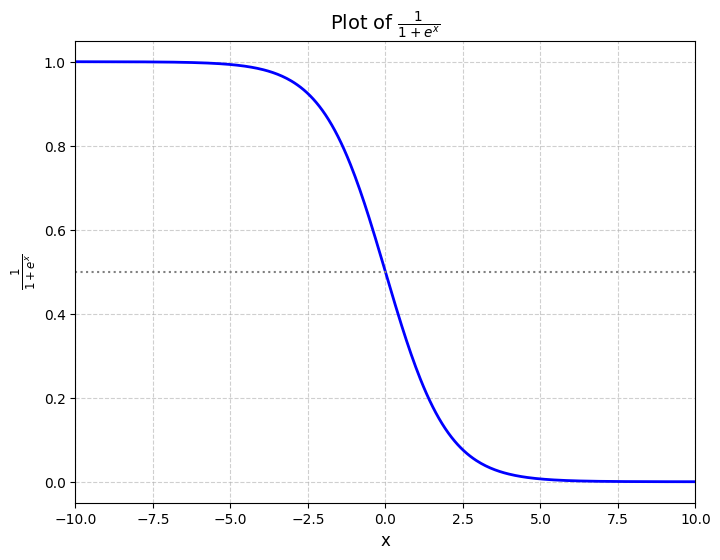

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)
# Compute y = 1 / (1 + exp(x))
y = 1 / (1 + np.exp(x))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Plot of $\\frac{1}{1 + e^{x}}$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('$\\frac{1}{1 + e^{x}}$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle=':')  # Add horizontal line at y=0.5
plt.xlim(-10, 10)  # Set x-axis limits
plt.show()

In [ ]:
# single s aeg1
# 0.02

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
k_values = np.linspace(0.1, 1, 10)  # Example k values

# ==========================
# Running Trials
# ==========================
reward_counts = {k: 0 for k in k_values}
regret_counts = {k: 0 for k in k_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for k in k_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            UCB_Inspired_Adaptive_Epsilon_Greedy,
            {'num_arms': num_arms, 'k': k},
            env,
            num_steps
        )
        trial_rewards[k] = cum_rewards[-1]
        trial_regrets[k] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_ks = [k for k, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_ks[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_ks = [k for k, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_ks[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for k in k_values:
    results.append({
        'k': f"{k:.3f}",
        'Reward Wins': reward_counts[k],
        'Regret Wins': regret_counts[k]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'Adaptive Epsilon-Greedy Performance Over {num_trials} Trials')
              )
display(results_df)


In [ ]:
# single s ucb
# 0.4

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
c_values = np.linspace(0.1, 3, 10)  # Example c values

# ==========================
# Running Trials
# ==========================
reward_counts = {c: 0 for c in c_values}
regret_counts = {c: 0 for c in c_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for c in c_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            UCB,
            {'num_arms': num_arms, 'c': c},
            env,
            num_steps
        )
        trial_rewards[c] = cum_rewards[-1]
        trial_regrets[c] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_cs = [c for c, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_cs[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_cs = [c for c, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_cs[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for c in c_values:
    results.append({
        'c': f"{c:.3f}",
        'Reward Wins': reward_counts[c],
        'Regret Wins': regret_counts[c]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'UCB Performance Over {num_trials} Trials')
              )
display(results_df)


In [ ]:
# single s exp3

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
gamma_values = np.linspace(0.01, 0.3, 10)  # Example gamma values

# ==========================
# Running Trials
# ==========================
reward_counts = {gamma: 0 for gamma in gamma_values}
regret_counts = {gamma: 0 for gamma in gamma_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for gamma in gamma_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            EXP3,
            {'num_arms': num_arms, 'gamma': gamma},
            env,
            num_steps
        )
        trial_rewards[gamma] = cum_rewards[-1]
        trial_regrets[gamma] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_gammas = [gamma for gamma, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_gammas[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_gammas = [gamma for gamma, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_gammas[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for gamma in gamma_values:
    results.append({
        'gamma': f"{gamma:.3f}",
        'Reward Wins': reward_counts[gamma],
        'Regret Wins': regret_counts[gamma]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'EXP3 Performance Over {num_trials} Trials')
              )
display(results_df)


In [ ]:
# single s e
# 0.01

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
epsilon_values = np.linspace(0.01, 1, 10)  # Example epsilon values

# ==========================
# Running Trials
# ==========================
reward_counts = {epsilon: 0 for epsilon in epsilon_values}
regret_counts = {epsilon: 0 for epsilon in epsilon_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for epsilon in epsilon_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            EpsilonGreedy,
            {'num_arms': num_arms, 'epsilon': epsilon},
            env,
            num_steps
        )
        trial_rewards[epsilon] = cum_rewards[-1]
        trial_regrets[epsilon] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_epsilons = [epsilon for epsilon, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_epsilons[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_epsilons = [epsilon for epsilon, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_epsilons[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for epsilon in epsilon_values:
    results.append({
        'epsilon': f"{epsilon:.3f}",
        'Reward Wins': reward_counts[epsilon],
        'Regret Wins': regret_counts[epsilon]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'Standard ε-Greedy Performance Over {num_trials} Trials')
              )
display(results_df)
